# An Introduction to the Discrete Fourier Transform
# Lecture 1: Overview



In [1]:
from IPython.display import Audio
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
%matplotlib notebook

### The text file "file.txt" contains sampled values from a recording of a note played on the piano at the rate of 44100 Hz.

### Load the data into an array and play the audio.

#### Graph the audio waveform. 

In [27]:
ys = np.loadtxt("file.txt")

In [28]:
ys

array([ 37.,  36.,  34., ..., 246., 262., 275.])

In [29]:
Audio(ys, rate=44100)

In [33]:
x = np.linspace(0, 2*np.pi, 100)
x

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

In [34]:
y = np.sin(x)
y

array([ 0.00000000e+00,  6.34239197e-02,  1.26592454e-01,  1.89251244e-01,
        2.51147987e-01,  3.12033446e-01,  3.71662456e-01,  4.29794912e-01,
        4.86196736e-01,  5.40640817e-01,  5.92907929e-01,  6.42787610e-01,
        6.90079011e-01,  7.34591709e-01,  7.76146464e-01,  8.14575952e-01,
        8.49725430e-01,  8.81453363e-01,  9.09631995e-01,  9.34147860e-01,
        9.54902241e-01,  9.71811568e-01,  9.84807753e-01,  9.93838464e-01,
        9.98867339e-01,  9.99874128e-01,  9.96854776e-01,  9.89821442e-01,
        9.78802446e-01,  9.63842159e-01,  9.45000819e-01,  9.22354294e-01,
        8.95993774e-01,  8.66025404e-01,  8.32569855e-01,  7.95761841e-01,
        7.55749574e-01,  7.12694171e-01,  6.66769001e-01,  6.18158986e-01,
        5.67059864e-01,  5.13677392e-01,  4.58226522e-01,  4.00930535e-01,
        3.42020143e-01,  2.81732557e-01,  2.20310533e-01,  1.58001396e-01,
        9.50560433e-02,  3.17279335e-02, -3.17279335e-02, -9.50560433e-02,
       -1.58001396e-01, -

<IPython.core.display.Javascript object>


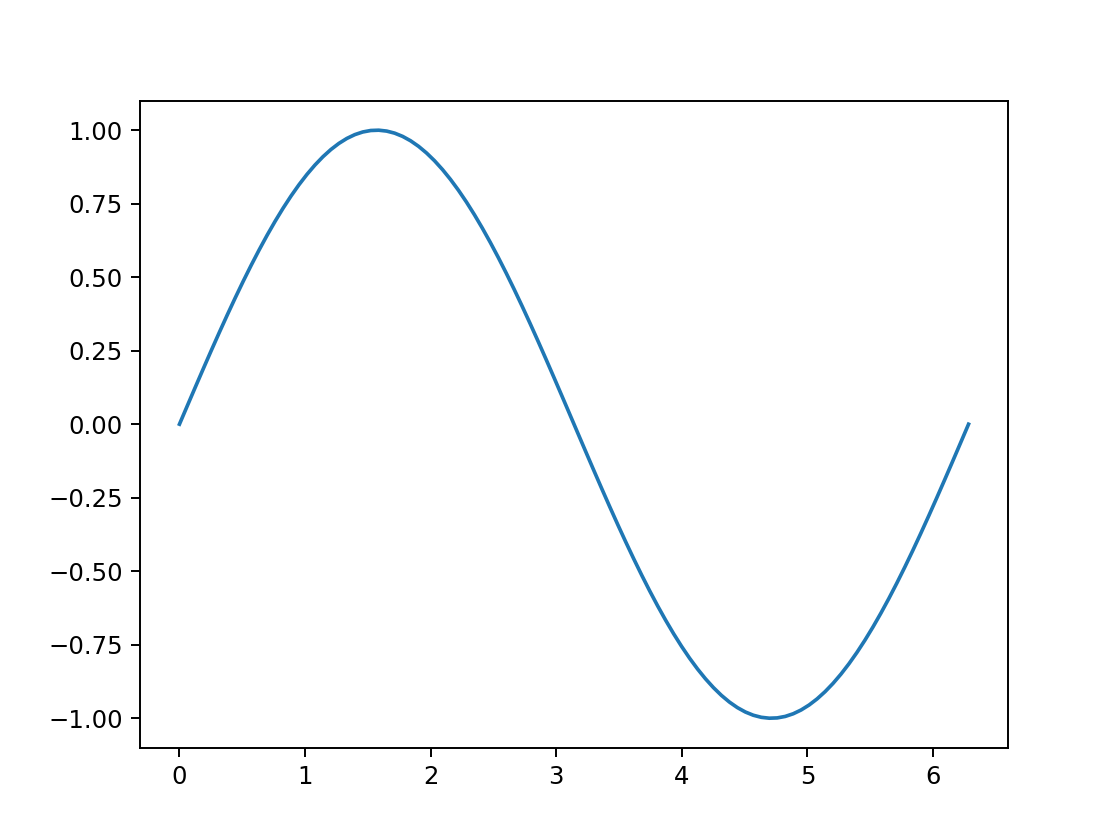

In [35]:
fig, ax = plt.subplots()
ax.plot(x, y)

In [ ]:
import matplotlib.pyplot as plt
N = ys.size
fs = 44100 # Hz
L = N/fs # seconds
ts = np.linspace(0, L, N)
fig, ax = plt.subplots()
ax.plot(ts, ys)
ax.set_xlim(.5,.8)

#### Use the Discrete Fourier Transform to convert the information to a different but equivalent representation: frequency domain representation.

#### $\{y_k : k=0,1,2,...,N-1\}\rightarrow \{Y_k : k=0,1,2,...,N-1\}$ 

#### Each $|Y_k|$ measures how much the frequency $f_k=k\cdot f_1$ is present in the audio signal where $f_1=1/L$ is the fundamental frequency.



#### The frequency set given by $f_k=k/L$ are called the harmonics. In this example, the fundamental frequency is $1/L=0.441$ Hz.

#### Let's create the frequency set $f_k$.

In [ ]:
k = np.arange(N) # 0 to N-1
freqs = k/L
freqs[0:10]

#### Use Numpy's fft module to compute the Fast Fourier Transform. 

In [ ]:
yk = np.fft.fft(ys)
yk.size

#### Graph the frequency domain representation. 

In [ ]:
fig, ax = plt.subplots()
ax.plot(freqs, np.abs(yk))
ax.set_xlim(0,3000)

#### The wav file a4_violin.wav contains a chord played on a violin.

In [ ]:
from scipy.io import wavfile
fs, ys = wavfile.read("a4_violin.wav")
Audio(ys, rate = fs)

#### Combine all of the sample code above to define a function `plot_signal_time` that plot a sampled signal.

In [ ]:
def plot_signal_time(ys, t1, t2, fs = 44100):
    N = ys.size # num of samples
    L = N/fs # duration of audio clip
    ts = np.linspace(0,L,N) # array of N equally spaced values from [0,L]
    fig, ax = plt.subplots()
    ax.plot(ts, ys)
    ax.set_xlim(t1, t2)
    ax.set_xlabel("Time(in seconds)")


#### Use `plot_signal_time` to plot the time domain representation of the violin recording.

In [ ]:
plot_signal_time(ys,0,.5)

In [ ]:
def plot_signal_frequency(ys, f1, f2, fs = 44100):
    N = ys.size
    L = N/fs
    yk = np.fft.fft(ys)
    k = np.arange(N) # 0 to N-1
    freqs = k/L
    fig, ax = plt.subplots()
    ax.plot(freqs, np.abs(yk))
    ax.set_xlim(f1,f2)
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("|yk|")
    

#### Use `plot_signal_frequency` to plot the frequency domain representation of the violin recording.

In [ ]:
plot_signal_frequency(ys, 0, 3000)

#### The file trumpet_chirp.txt contains a trumpet note with some high frequency noise(I added a linear chirp consisting a sinusoid that sweeps linearly through a range of high frequencies). 


In [ ]:
ys = np.loadtxt("trumpet_chirp.txt")
Audio(ys,rate=fs)

#### One of the assignments for this video is to filter out this high frequency noise and create a new .wav file of just the trumpet. 

#### Your assignment for this lecture is to analyze notes/chords of various instruments.  